In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import os

from IPython.display import clear_output
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
IMAGE_SIZE = (224,224)

In [17]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/project4data/Alzheimer_s Dataset/train",
    labels = 'inferred',
    validation_split=0.2,
    subset="training",
    label_mode="int",
    color_mode="rgb",
    class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'],
    seed=42,
    image_size=IMAGE_SIZE,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/project4data/Alzheimer_s Dataset/train",
    labels = 'inferred',
    validation_split=0.2,
    subset="validation",
    label_mode="int",
    color_mode="rgb",
    class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'],
    seed=42,
    image_size=IMAGE_SIZE,
)


test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/project4data/Alzheimer_s Dataset/test",
    labels = 'inferred',
    label_mode="int",
    color_mode="rgb",
    class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'],
    seed=42,
    image_size=IMAGE_SIZE,
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.
Found 5121 files belonging to 4 classes.
Using 1024 files for validation.
Found 1279 files belonging to 4 classes.


In [18]:
def model1():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(*IMAGE_SIZE, 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        tf.keras.layers.SeparableConv2D(32, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.SeparableConv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(),

        tf.keras.layers.SeparableConv2D(128, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.SeparableConv2D(256, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.6),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    
    return model

In [19]:
model = model1()

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 separable_conv2d_4 (Separab  (None, 112, 112, 32)     688       
 leConv2D)                                                       
                                                                 
 batch_normalization_8 (Batc  (None, 112, 112, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
checkpoint_filepath = '/content/drive/MyDrive/model4/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [23]:
history = model.fit(train_ds,
          epochs=20,
          callbacks=[model_checkpoint_callback],
          batch_size=32,
          validation_data = val_ds
          )

Epoch 1/20
129/129 [==============================] - 993s 8s/step - loss: 1.6409 - accuracy: 0.3688 - val_loss: 2.2575 - val_accuracy: 0.2578
Epoch 2/20
129/129 [==============================] - 13s 99ms/step - loss: 1.1912 - accuracy: 0.4979 - val_loss: 1.6638 - val_accuracy: 0.1396
Epoch 3/20
129/129 [==============================] - 13s 99ms/step - loss: 1.0413 - accuracy: 0.5511 - val_loss: 1.2169 - val_accuracy: 0.3555
Epoch 4/20
129/129 [==============================] - 13s 98ms/step - loss: 0.9488 - accuracy: 0.5721 - val_loss: 1.2351 - val_accuracy: 0.3555
Epoch 5/20
129/129 [==============================] - 13s 101ms/step - loss: 0.8786 - accuracy: 0.6163 - val_loss: 1.1154 - val_accuracy: 0.4150
Epoch 6/20
129/129 [==============================] - 13s 100ms/step - loss: 0.8149 - accuracy: 0.6480 - val_loss: 0.8269 - val_accuracy: 0.6025
Epoch 7/20
129/129 [==============================] - 14s 102ms/step - loss: 0.7587 - accuracy: 0.6710 - val_loss: 0.8656 - val_accurac

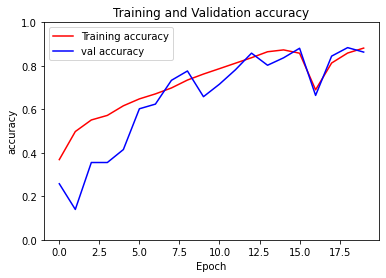

In [24]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(20)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'r', label='val accuracy',color = 'b')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [25]:
model.load_weights(checkpoint_filepath)

In [26]:
model.evaluate(test_ds)

40/40 [==============================] - 432s 9s/step - loss: 1.0350 - accuracy: 0.6341


[1.0349946022033691, 0.6340891122817993]